# 🖌 Feedback Interface Notebook
This notebook walks you through how to use the domino feedback interface. 

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import mosaic as ms
import matplotlib.pyplot as plt

from domino.data.cxr import get_dp, build_cxr_df
from domino.feedback import FeedbackInterface

In [2]:
build_cxr_df(root_dir="/media/4tb_hdd/siim/")

task: build_cxr_df, run_id=21


In [4]:
# Get a mosaic DataPanel with the data.
df = build_cxr_df.out(load=True)
dp = get_dp(df)
dp.head()

,image_id (NumpyArrayColumn),encoded_pixels (NumpyArrayColumn),pmx (NumpyArrayColumn),filepath (NumpyArrayColumn),chest_tube (NumpyArrayColumn),split (NumpyArrayColumn),gaze_seq (NumpyArrayColumn),gaze_heatmap (NumpyArrayColumn),gaze_max_visit (NumpyArrayColumn),gaze_unique (NumpyArrayColumn),gaze_time (NumpyArrayColumn),gaze_diffusivity (NumpyArrayColumn),index (ListColumn),input (CellColumn),img (CellColumn)
0,1.2.276.0.7230010.3.1.4.8323329.6904.151787520...,-1,0,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,nan,nan,nan,nan,nan,nan,'0',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
1,1.2.276.0.7230010.3.1.4.8323329.13666.15178752...,557374 2 1015 8 1009 14 1002 20 997 26 990 32 ...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,nan,nan,nan,nan,nan,nan,'1',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
2,1.2.276.0.7230010.3.1.4.8323329.11028.15178752...,-1,0,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,nan,nan,nan,nan,nan,nan,'2',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
3,1.2.276.0.7230010.3.1.4.8323329.10366.15178752...,514175 10 1008 29 994 30 993 32 991 33 990 34 ...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,nan,nan,nan,nan,nan,nan,'3',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
4,1.2.276.0.7230010.3.1.4.8323329.10016.15178752...,592184 33 976 58 956 73 941 88 926 102 917 109...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,nan,nan,nan,nan,nan,nan,'4',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...


In [22]:
dp.lz[dp["gaze_seq"].data != "nan"]

,image_id (NumpyArrayColumn),encoded_pixels (NumpyArrayColumn),pmx (NumpyArrayColumn),filepath (NumpyArrayColumn),chest_tube (NumpyArrayColumn),split (NumpyArrayColumn),gaze_seq (NumpyArrayColumn),gaze_heatmap (NumpyArrayColumn),gaze_max_visit (NumpyArrayColumn),gaze_unique (NumpyArrayColumn),gaze_time (NumpyArrayColumn),gaze_diffusivity (NumpyArrayColumn),index (ListColumn),input (CellColumn),img (CellColumn)
0,1.2.276.0.7230010.3.1.4.8323329.1857.151787516...,378999 2 1018 8 1013 13 1009 15 1007 17 1006 1...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,1.0,train,"[(0.3002531741212215, 0.9348943074817682, 2), ...",[[ 0. 0. 0. 14. 2. 2. 1. 0.]\n [ 0. 0. ...,[14.],[12],[33.],[0.54545456],'29',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
1,1.2.276.0.7230010.3.1.4.8323329.1219.151787516...,-1,0,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,1.0,train,"[(0.3135288701615107, 0.5596042556980056, 2), ...",[[0. 0. 0. 1. 3. 0. 0. 0.]\n [0. 0. 0. 3. 3. 2...,[7.],[19],[46.],[0.36956522],'39',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
2,1.2.276.0.7230010.3.1.4.8323329.518.1517875163...,-1,0,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,"[(0.12663856335055726, 0.6144331769405472, 2),...",[[ 0. 0. 0. 0. 0. 0. 0. 0.]\n [ 0. 0. ...,[12.],[24],[77.],[0.37662338],'40',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
3,1.2.276.0.7230010.3.1.4.8323329.2118.151787517...,591104 8 1011 18 1001 26 993 32 988 36 986 37 ...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,1.0,train,"[(0.1227472372112641, 0.5808183519907184, 3), ...",[[ 0. 0. 0. 0. 4. 1. 0. 1.]\n [ 0. 0. ...,[10.],[23],[81.],[0.39506173],'43',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
4,1.2.276.0.7230010.3.1.4.8323329.2027.151787517...,500845 25 992 38 983 41 980 44 978 46 975 49 9...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,0.0,train,"[(0.3294461311053661, 0.5748967530438639, 4), ...",[[ 0. 0. 4. 1. 10. 8. 0. 0.]\n [ 0. 0. ...,[11.],[21],[78.],[0.64102566],'50',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1.2.276.0.7230010.3.1.4.8323329.471.1517875163...,643243 2 1021 6 1018 6 1017 7 1016 8 1015 9 10...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,NaN,train,"[(0.2763371350485025, 0.6075920774427064, 2), ...",[[ 0. 0. 0. 0. 0. 0. 2. 0.]\n [ 0. 1. ...,[0],[32],[126.],[0.31746033],'11967',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
1246,1.2.276.0.7230010.3.1.4.8323329.1541.151787516...,587909 1 1014 11 1008 16 1003 20 1000 23 998 2...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,0.0,train,"[(0.5013280823041535, 0.6922571012291925, 2), ...",[[ 0. 0. 2. 3. 0. 11. 0. 0.]\n [ 0. 0. ...,[11.],[14],[55.],[0.45454545],'11974',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
1247,1.2.276.0.7230010.3.1.4.8323329.1957.151787517...,416852 1 1019 5 1018 6 1016 8 1015 9 1014 9 10...,1,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,1.0,train,"[(0.19784996403049912, 0.37469221894094146, 2)...",[[ 0. 0. 0. 4. 13. 0. 0. 1.]\n [ 0. 0. ...,[13.],[10],[30.],[0.90000003],'11983',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...
1248,1.2.276.0.7230010.3.1.4.8323329.1400.151787516...,-1,0,/media/4tb_hdd/siim/dicom-images-train/1.2.276...,0.0,train,"[(0.16008087258271517, 0.5377391177386264, 2),...",[[0. 0. 0. 0. 0. 0. 0. 0.]\n [0. 0. 0. 0. 2. 0...,[5.],[8],[15.],[0.80000003],'12029',MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...,MedicalVolumeCell([PosixPath('/media/4tb_hdd/s...


In [3]:
# Spin up an interface
fb = FeedbackInterface(
    dp, 
    img_column="img", # the column containing the images, must materialize to a PIL image
    label_column="pmx", # the label of the image 
    id_column="image_id", # a column that uniquely identifies each image in the DataPanel
    save_dir="/media/4tb_hdd/siim/feedback" # the directory where the labels will be saved
)

The submitted feedback will be saved as a `DataPanel` at /home/common/datasets/cxr-tube/feedback/fb_21-06-07_16-04_1b0970.dp
Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.


In [6]:
# As you submit feedback, the DataPanel `fb.label_dp` will be updated.
# We can inspect it while we're labeling to see what's been labeled
fb.label_dp.head()

,image_id (NumpyArrayColumn),index (ListColumn),feedback_label (NumpyArrayColumn),feedback_mask (ListColumn)
0,1.2.276.0.7230010.3.1.4.8323329.4956.151787518...,'3707',positive,"array([[[0, 0, 0],\n [0, 0, 0],\n ..."
1,1.2.276.0.7230010.3.1.4.8323329.3877.151787517...,'313',unlabeled,None
2,1.2.276.0.7230010.3.1.4.8323329.2593.151787517...,'8886',positive,"array([[[0, 0, 0],\n [0, 0, 0],\n ..."
3,1.2.276.0.7230010.3.1.4.8323329.5931.151787519...,'10675',unlabeled,None
4,1.2.276.0.7230010.3.1.4.8323329.4217.151787518...,'730',unlabeled,None


In [7]:
# When you're done labeling, you can merge the feedback datapanel into
# the original datapanel to explore the feedback side-by-side with the
# original images 
merged_dp = ms.merge(dp, fb.label_dp, on="image_id", how="left")

In [11]:
# Important to delete the interface object when done labeling, because the 
# interface temporarily caches a bunch of images to disk and __del__ remove them
fb.__del__()

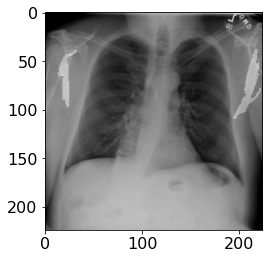

In [22]:
from gradio.processing_utils import resize_and_crop
idx = 8886
plt.imshow(resize_and_crop(merged_dp["img"][idx], (224,224)), cmap="gray")
plt.imshow((merged_dp["feedback_mask"][idx] == 1).astype(float), alpha=0.2, cmap="Blues_r")